<a href="https://colab.research.google.com/github/djdumpling/Machine-Learning-Prince-/blob/main/6_1_Line_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def loss_function(phi):
  return 1- 0.5 * np.exp(-(phi-0.65)*(phi-0.65)/0.1) - 0.45 *np.exp(-(phi-0.35)*(phi-0.35)/0.02)

In [ ]:
def draw_function(loss_function,a=None, b=None, c=None, d=None):
  # Plot the function
  phi_plot = np.arange(0,1,0.01);
  fig,ax = plt.subplots()
  ax.plot(phi_plot,loss_function(phi_plot),'r-')
  ax.set_xlim(0,1); ax.set_ylim(0,1)
  ax.set_xlabel(r' phi'); ax.set_ylabel(r' L[phi]')
  if a is not None and b is not None and c is not None and d is not None:
      plt.axvspan(a, d, facecolor='k', alpha=0.2)
      ax.plot([a,a],[0,1],'b-')
      ax.plot([b,b],[0,1],'b-')
      ax.plot([c,c],[0,1],'b-')
      ax.plot([d,d],[0,1],'b-')
  plt.show()

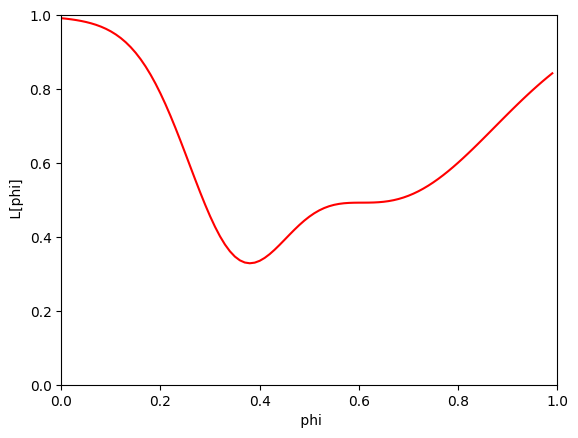

In [ ]:
draw_function(loss_function)

In [ ]:
def line_search(loss_function, thresh=0.000001, max_iter = 30, draw_flag = False):
  #Initalize four points along the searching range
  a = 0
  b = 0.33
  c = 0.66
  d = 1.0
  n_iter = 0

  #while we haven't found the minimum closely enough:
  #we want minimum closely bracketed between b and c
  while np.abs(b-c) > thresh and n_iter < max_iter:
    n_iter = n_iter+1

    lossa= loss_function(a)
    lossb= loss_function(b)
    lossc= loss_function(c)
    lossd= loss_function(d)

    if draw_flag: draw_function(loss_function, a,b,c,d)

    print('Iter %d, a=%5.5f, b=%5.5f, c=%5.5f, d=%5.5f'%(n_iter, a,b,c,d))

    if lossa < lossb and lossa<lossc and lossa<lossd:
      b = b/2
      c = c/2
      d = d/2

    if lossb < lossc:
      d = c
      c = 2/3 * d + 1/3 * a
      b = 1/3 * d + 2/3 * a

    if lossb > lossc:
      a = b
      b = 2/3 * a + 1/3 * d
      c = 1/3 * a + 2/3 * d

  soln = (b+c)/2

  return soln

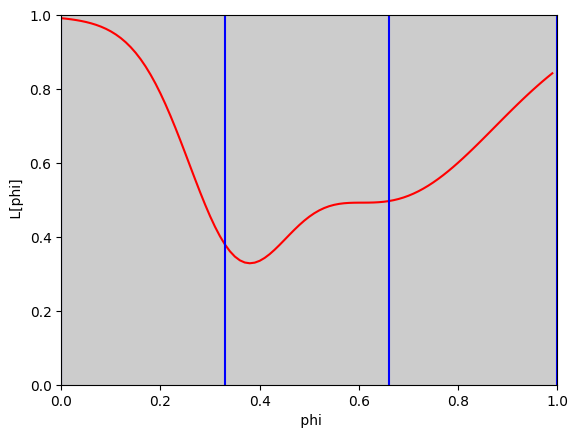

Iter 1, a=0.00000, b=0.33000, c=0.66000, d=1.00000


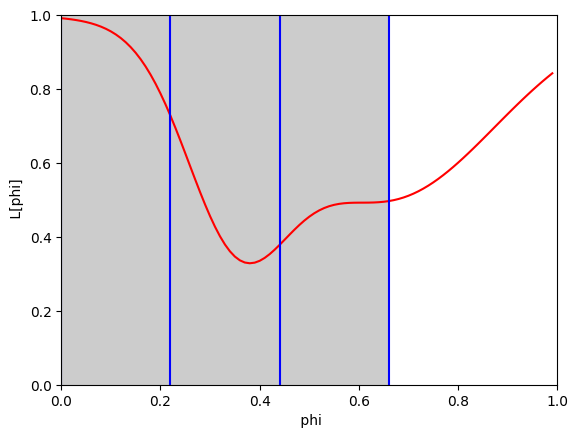

Iter 2, a=0.00000, b=0.22000, c=0.44000, d=0.66000


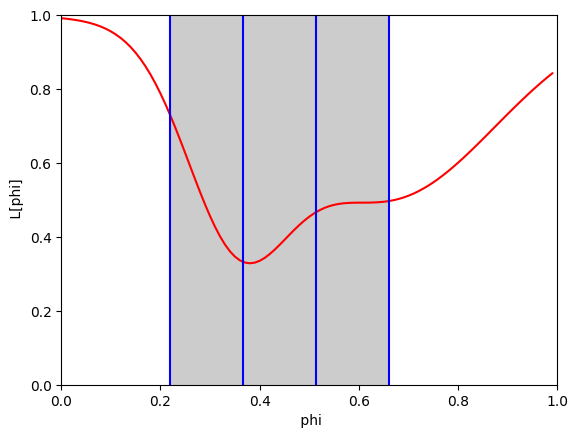

Iter 3, a=0.22000, b=0.36667, c=0.51333, d=0.66000


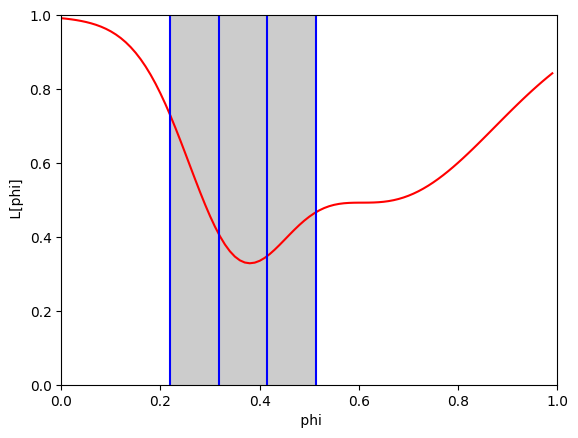

Iter 4, a=0.22000, b=0.31778, c=0.41556, d=0.51333


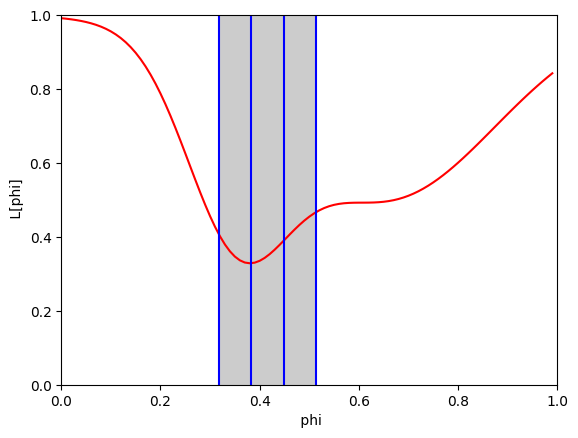

Iter 5, a=0.31778, b=0.38296, c=0.44815, d=0.51333


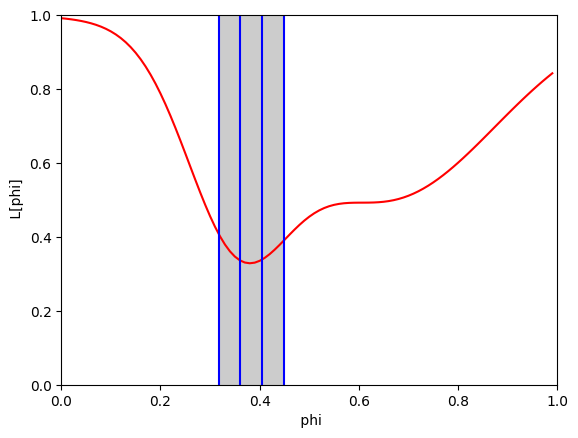

Iter 6, a=0.31778, b=0.36123, c=0.40469, d=0.44815


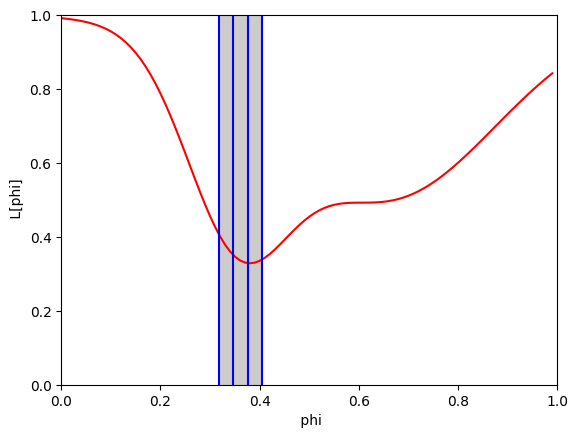

Iter 7, a=0.31778, b=0.34675, c=0.37572, d=0.40469


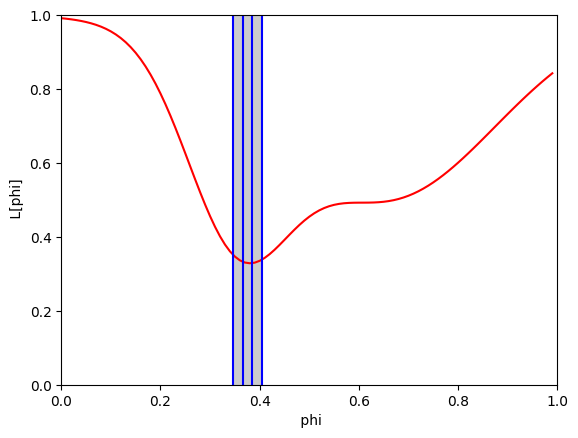

Iter 8, a=0.34675, b=0.36606, c=0.38538, d=0.40469


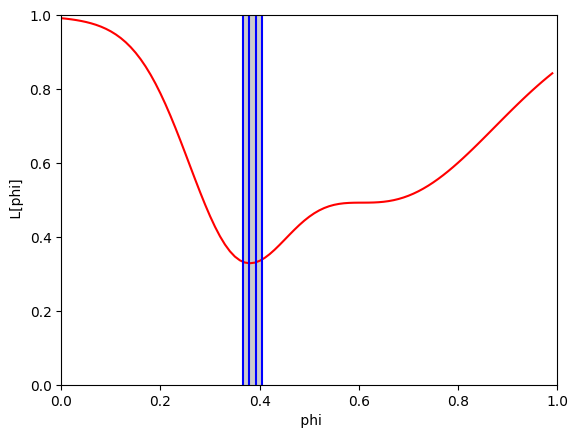

Iter 9, a=0.36606, b=0.37894, c=0.39182, d=0.40469


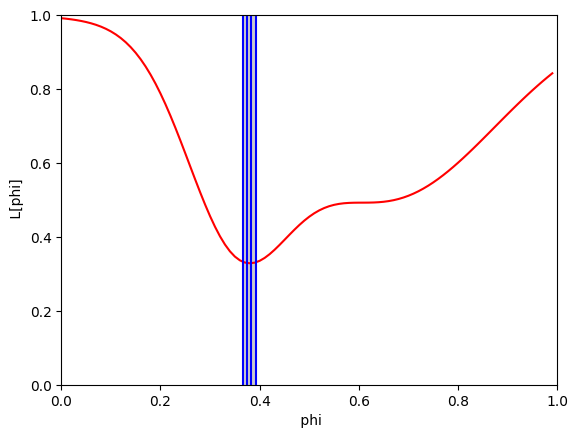

Iter 10, a=0.36606, b=0.37465, c=0.38323, d=0.39182


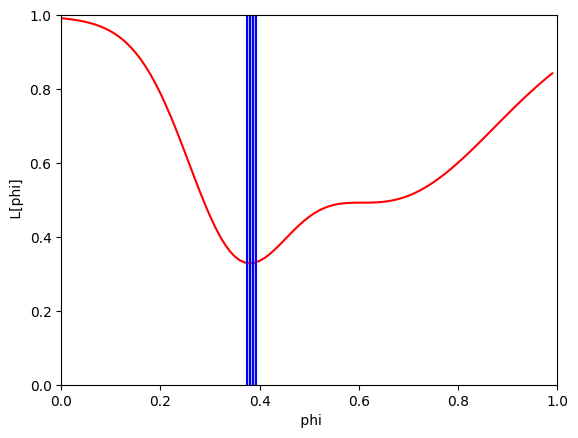

Iter 11, a=0.37465, b=0.38037, c=0.38609, d=0.39182


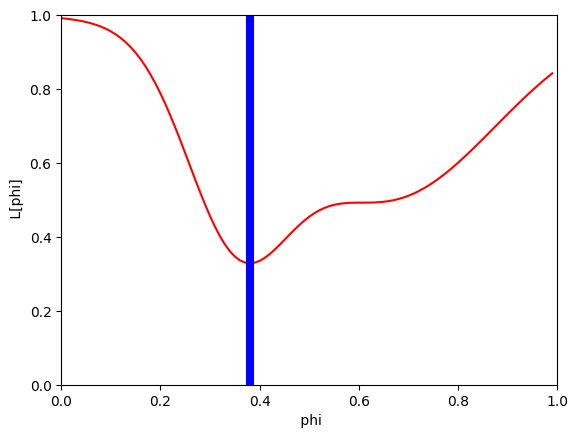

Iter 12, a=0.37465, b=0.37846, c=0.38228, d=0.38609


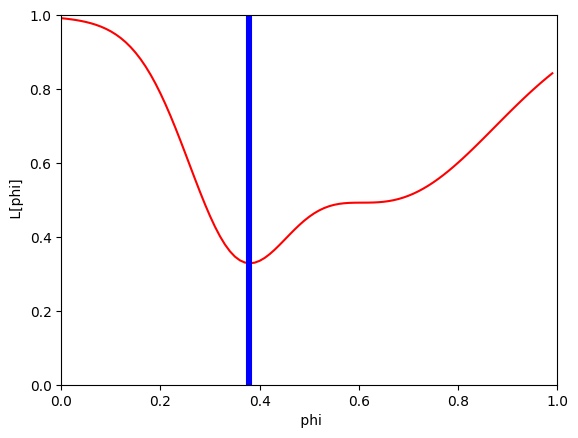

Iter 13, a=0.37465, b=0.37719, c=0.37973, d=0.38228


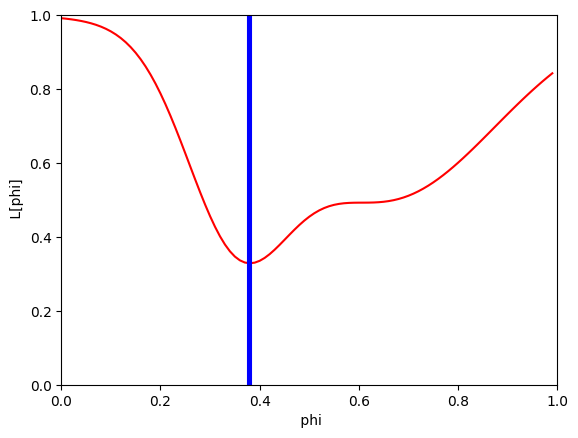

Iter 14, a=0.37719, b=0.37889, c=0.38058, d=0.38228


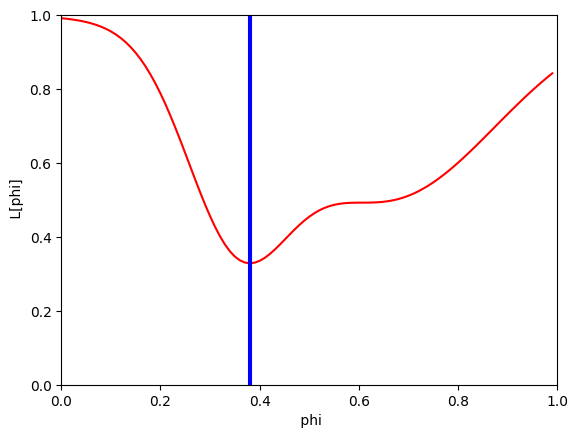

Iter 15, a=0.37889, b=0.38002, c=0.38115, d=0.38228


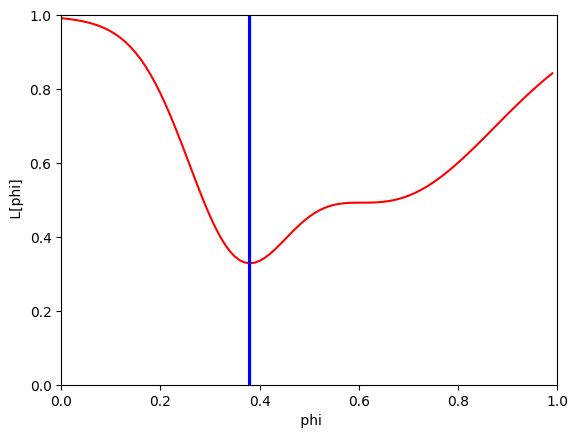

Iter 16, a=0.37889, b=0.37964, c=0.38039, d=0.38115


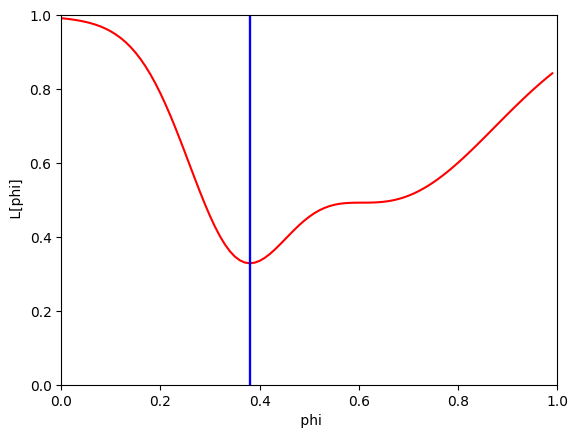

Iter 17, a=0.37964, b=0.38014, c=0.38064, d=0.38115


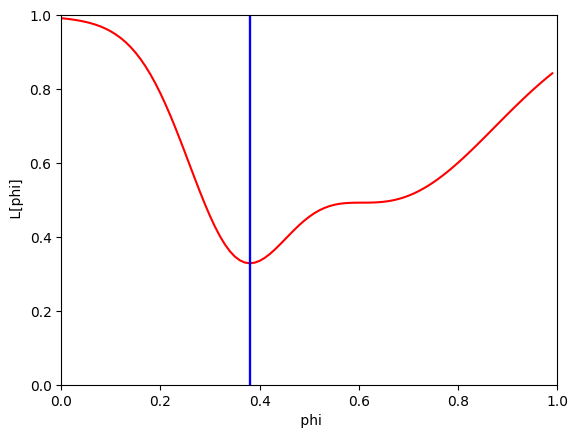

Iter 18, a=0.37964, b=0.37997, c=0.38031, d=0.38064


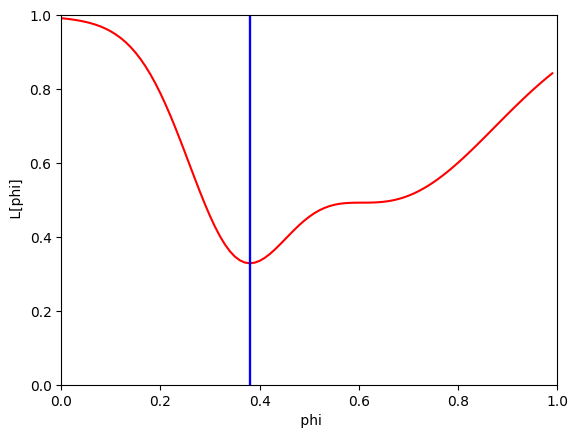

Iter 19, a=0.37997, b=0.38020, c=0.38042, d=0.38064


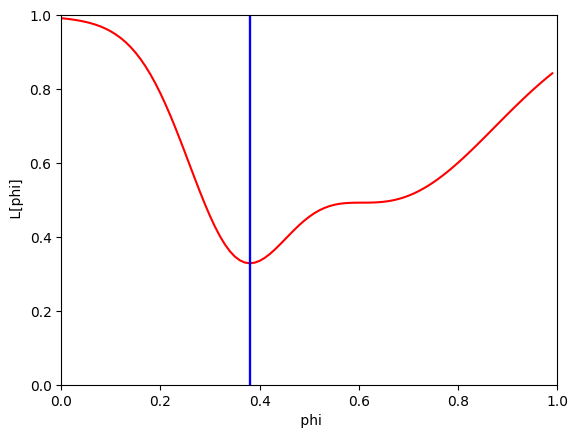

Iter 20, a=0.38020, b=0.38035, c=0.38050, d=0.38064


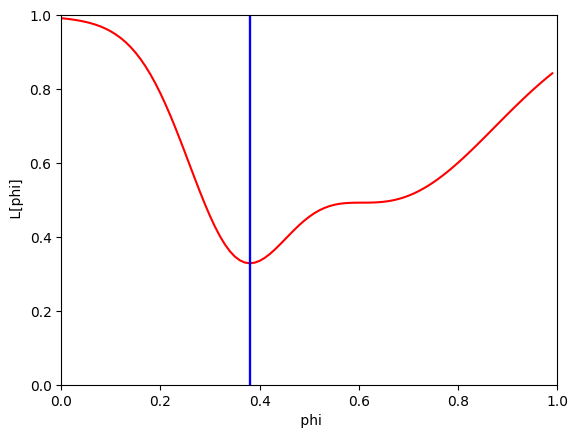

Iter 21, a=0.38020, b=0.38030, c=0.38040, d=0.38050


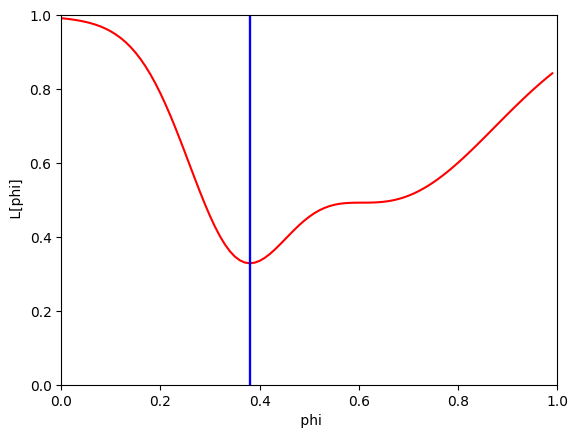

Iter 22, a=0.38020, b=0.38026, c=0.38033, d=0.38040


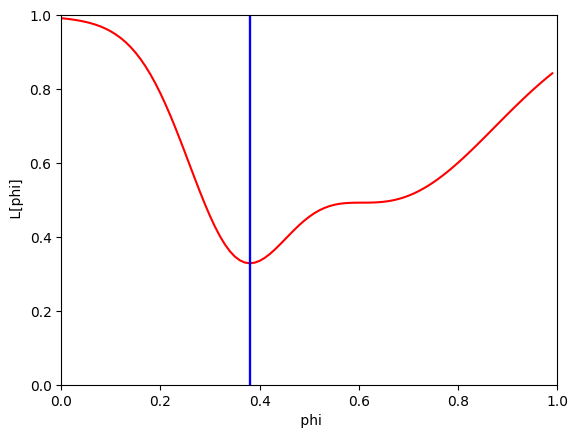

Iter 23, a=0.38026, b=0.38031, c=0.38035, d=0.38040


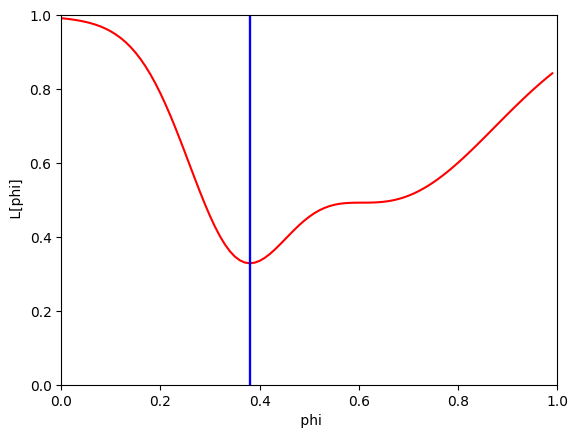

Iter 24, a=0.38026, b=0.38029, c=0.38032, d=0.38035


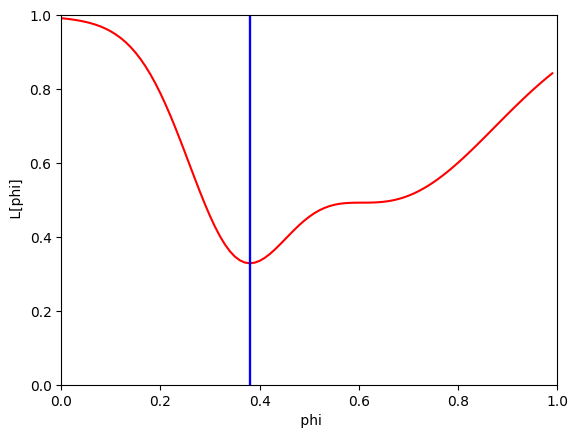

Iter 25, a=0.38029, b=0.38031, c=0.38033, d=0.38035


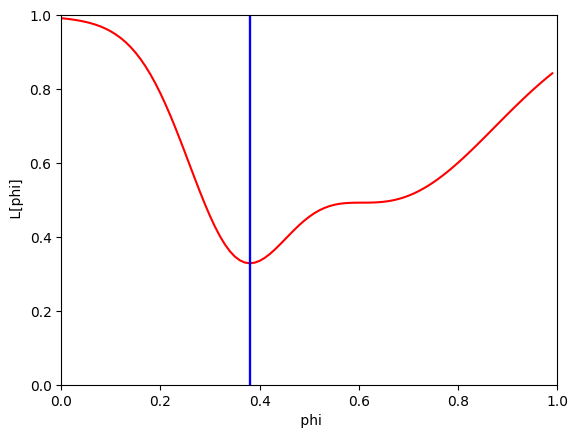

Iter 26, a=0.38029, b=0.38031, c=0.38032, d=0.38033


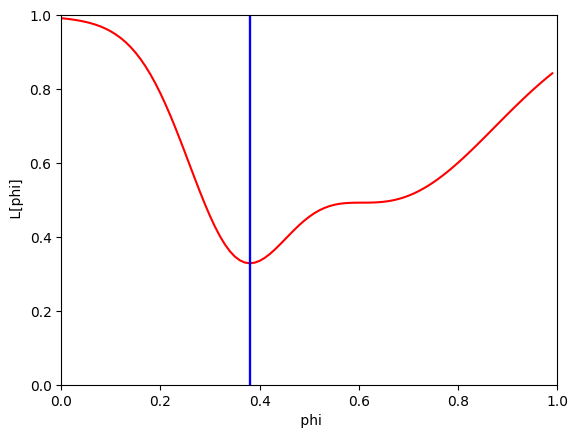

Iter 27, a=0.38031, b=0.38032, c=0.38032, d=0.38033


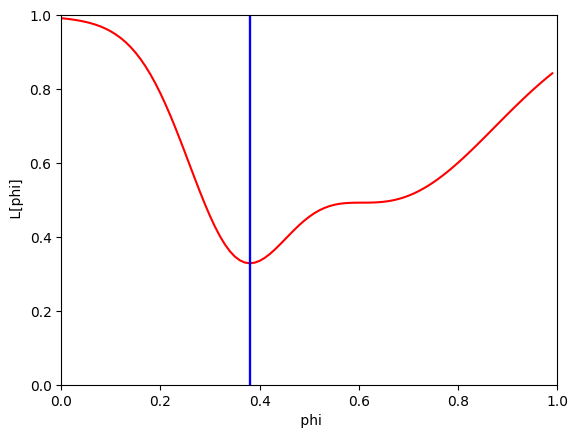

Iter 28, a=0.38032, b=0.38032, c=0.38033, d=0.38033


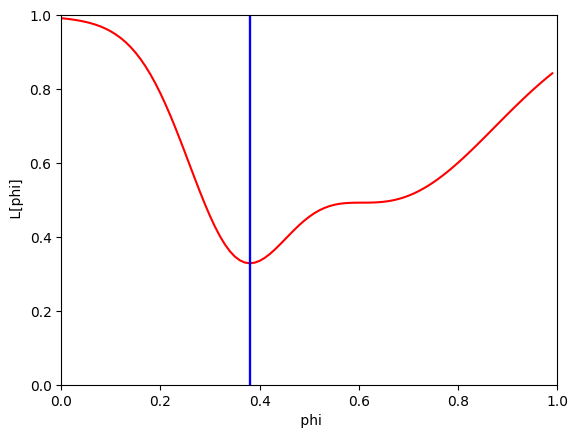

Iter 29, a=0.38032, b=0.38032, c=0.38032, d=0.38033


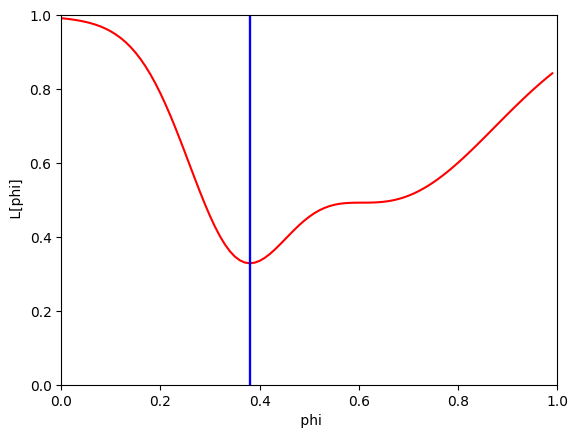

Iter 30, a=0.38032, b=0.38032, c=0.38032, d=0.38033
Soln = 0.38032, loss = 0.32860


In [ ]:
soln = line_search(loss_function, draw_flag=True)
print('Soln = %5.5f, loss = %5.5f'%(soln,loss_function(soln)))